Лабораторная работа №2

Тема: Алгебра матриц. Быстрое умножение матриц. Вычисление обратной матрицы.
Нахождение собственных чисел и собственных векторов матрицы.

Цель работы: Изучить алгебраические операции над матрицами, особенности
алгоритмизации быстрых матричных алгоритмов (на примере умножения матриц),
вычисления обратной матрицы, нахождения собственных чисел и собственных векторов
матрицы.

Вариант 10

Индивидуальное задание:
\begin{equation*}
A = \begin{pmatrix}
-177&160&-186\\
180&-192&185\\
-183&175&-190
\end{pmatrix}
\end{equation*}

**Часть первая**

Найти обратную матрицу вручную.

\begin{bmatrix}
        -177 & 160 & -186 & 1 & 0 & 0\\
        180 & -192 & 185  & 0 & 1 & 0\\
        -183 & 175 & - 190 & 0 & 0 & 1
    \end{bmatrix}

\begin{bmatrix}
        1 & -\frac{160}{177} & 1\frac{9}{177} &  -\frac{1}{177} & 0 & 0 \\
        180 & -192 & 185  & 0 & 1 & 0\\
        -183 & 175 & - 190 & 0 & 1 & 0
    \end{bmatrix}

\begin{bmatrix}
        1 & -\frac{160}{177} & 1\frac{9}{177} & -\frac{1}{177} & 0 & 0\\
        0 & -29\frac{17}{59} & -4\frac{9}{59} & 1\frac{3}{177} & 1 & 0\\
        0 & 9\frac{34}{59} &2\frac{18}{59} &-1\frac{6}{177} & 0 & 1
    \end{bmatrix}

\begin{bmatrix}
        1 & -\frac{160}{177} & 1\frac{9}{177} & -\frac{1}{177} & 0 & 0 \\
        0 & 1 & \frac{245}{1728} & -\frac{5}{144} & -\frac{59}{1728} & 0 \\
        0 & 9\frac{34}{59} &2\frac{18}{59} & -1\frac{6}{177} & 0 & 1
    \end{bmatrix}

\begin{bmatrix}
        1 & 0 & 1\frac{29}{162} & -\frac{1}{27} & -\frac{5}{162} & 0 \\
        0 & 1 & \frac{245}{1728} & -\frac{5}{144} & -\frac{59}{1728} & 0 \\
        0 & 0 & \frac{1637}{1728} &-\frac{101}{144} & \frac{565}{1728} & 1
\end{bmatrix}

\begin{bmatrix}
        1 & 0 & 1\frac{29}{162} & -\frac{1}{27} & -\frac{5}{162} & 0 \\
        0 & 1 & \frac{245}{1728} & -\frac{5}{144} & -\frac{59}{1728} & 0 \\
        0 & 0 & 1 &-\frac{1212}{1637} & \frac{565}{1637} & 1\frac{91}{1637}
\end{bmatrix}

\begin{bmatrix}
        1 & 0 & 0 & \frac{4105}{4911} & -\frac{2150}{4911} & -1\frac{1201}{4911}\\
        0 & 1 & 0 &\frac{115}{1637}&-\frac{136}{1637}&-\frac{245}{1637}\\
        0 & 0 & 1&-\frac{1212}{1637} & \frac{565}{1637} & 1\frac{91}{1637}
\end{bmatrix}

Таким образом:
\begin{equation}
A ^ {-1} = \begin{pmatrix}
\frac{4105}{4911} & -\frac{2150}{4911} & -1\frac{1201}{4911}\\
\frac{115}{1637}&-\frac{136}{1637}&-\frac{245}{1637}\\
-\frac{1212}{1637} & \frac{565}{1637} & 1\frac{91}{1637}
\end{pmatrix}
\end{equation}

**Вторая часть**

Напишите и выполните короткие программы на языке Python для нахождения обратной матрицы и нахождения собственных чисел и собственных векторов матрицы

In [ ]:
import numpy as np

def compute_inverse_newton_schulz(matrix, num_iterations=5):
    """
    Вычисляет обратную матрицу к заданной матрице с использованием метода Ньютона-Шульца.

    Алгоритм начинает с инициализации начального приближения обратной матрицы и итеративно улучшает это приближение.

    Параметры:
    matrix : np.array
        Исходная квадратная матрица, для которой необходимо найти обратную.
    num_iterations : int
        Количество итераций для улучшения приближения обратной матрицы.

    Возвращает:
    np.array
        Приближенное значение обратной матрицы.
    """
    assert matrix.shape[0] == matrix.shape[1], "Матрица должна быть квадратной"

    # Инициализация начального приближения X_0 как транспонированной матрицы A, нормированной на квадрат нормы A
    initial_approximation = matrix.T / (np.linalg.norm(matrix) ** 2)
    # Единичная матрица того же размера, что и A
    identity_matrix = np.eye(matrix.shape[0])

    # Итеративное улучшение приближения обратной матрицы
    for _ in range(num_iterations):
        initial_approximation = initial_approximation @ (2 * identity_matrix - matrix @ initial_approximation)

    return initial_approximation

# Пример использования функции
matrix = np.array([[-177, 160, -186],
              [ 180, -192,  185],
              [-183, 175, -190]], dtype=np.float64)

print("Исходная матрица:")
print(matrix)

# Вычисление обратной матрицы с использованием метода Ньютона-Шульца
inverse_matrix_ns = compute_inverse_newton_schulz(matrix, num_iterations=10)
print("\nОбратная матрица, полученная методом Ньютона-Шульца:")
print(inverse_matrix_ns)

# Вычисление обратной матрицы с использованием np.linalg.inv
inverse_matrix_np = np.linalg.inv(matrix)
print("\nОбратная матрица, полученная с помощью np.linalg.inv:")
print(inverse_matrix_np)

# Сравнение результатов
print("\nРазница между методами:")
print(inverse_matrix_ns - inverse_matrix_np)

Исходная матрица:
[[-177.  160. -186.]
 [ 180. -192.  185.]
 [-183.  175. -190.]]

Обратная матрица, полученная методом Ньютона-Шульца:
[[-0.00725779 -0.00859354 -0.00360724]
 [-0.01881217 -0.02411831 -0.00474856]
 [-0.01243553 -0.01259589 -0.00279614]]

Обратная матрица, полученная с помощью np.linalg.inv:
[[ 0.83587864 -0.43779271 -1.24455304]
 [ 0.07025046 -0.0830788  -0.14966402]
 [-0.74037874  0.34514356  1.05558949]]

Разница между методами:
[[-0.84313643  0.42919917  1.2409458 ]
 [-0.08906263  0.0589605   0.14491546]
 [ 0.72794321 -0.35773945 -1.05838563]]


Матрица, полученная при помощи np.linalg.inv совпадает с полученной матрицей; матрица, полученная при помощи метода Ньютона-Шульца, содержит ошибки.



In [ ]:
import numpy as np

def find_eigens(matrix):
    """
    Находит собственные значения и собственные вектора квадратной матрицы.

    Аргументы:
    matrix (np.array): Квадратная матрица.

    Возвращает:
    tuple: кортеж, содержащий массив собственных значений и матрицу собственных векторов.
    """
    # Вычисляем собственные значения и собственные вектора
    eigenvalues, eigenvectors = np.linalg.eig(matrix)
    return eigenvalues, eigenvectors

# Пример использования
A = np.array([[-177, 160, -186],
              [ 180, -192,  185],
              [-183, 175, -190]], dtype=np.float64)

print("Исходная матрица:\n", A)
eigenvalues, eigenvectors = find_eigens(A)
print("Собственные числа матрицы:\n", eigenvalues)
print("Собственные вектора матрицы:\n", eigenvectors)

Исходная матрица:
 [[-177.  160. -186.]
 [ 180. -192.  185.]
 [-183.  175. -190.]]
Собственные числа матрицы:
 [-5.42616323e+02  5.34948533e-01 -1.69186256e+01]
Собственные вектора матрицы:
 [[ 0.55587578 -0.75353337  0.60117474]
 [-0.59283689 -0.07715901  0.78360926]
 [ 0.58270622  0.65286595  0.15666991]]


**Первое задание**

Написать программы, демонстрирующей алгоритмическую реализацию умножения Штрассена для
матриц на языке Python. Подсчитать количество операций умножения над вещественными
числами для «прямого» перемножения двух матриц размерами 256x256 и для алгоритма
Штрассена.

In [ ]:
import numpy as np

def strassen_mat_mul(mat_left, mat_right):
    """
    Умножает две квадратные матрицы по алгоритму Штрассена.

    Аргументы:
    mat_left, mat_right -- квадратные матрицы одинакового размера,
                               размеры которых являются степенью двойки.

    Возвращает:
    Результат умножения двух матриц.
    """
    size = mat_left.shape[0]
    if size == 1:
        # Базовый случай: умножение элементов.
        return mat_left * mat_right
    else:
        # Разделение матриц на подматрицы.
        mid = size // 2
        left_top = mat_left[:mid, :mid]
        right_top = mat_left[:mid, mid:]
        left_bottom = mat_left[mid:, :mid]
        right_bottom = mat_left[mid:, mid:]

        top_left = mat_right[:mid, :mid]
        top_right = mat_right[:mid, mid:]
        bottom_left = mat_right[mid:, :mid]
        bottom_right = mat_right[mid:, mid:]

        # Семь умножений по алгоритму Штрассена.
        m1 = strassen_mat_mul(left_top + right_bottom, top_left + bottom_right)
        m2 = strassen_mat_mul(left_bottom + right_bottom, top_left)
        m3 = strassen_mat_mul(left_top, top_right - bottom_right)
        m4 = strassen_mat_mul(right_bottom, bottom_left - top_left)
        m5 = strassen_mat_mul(left_top + right_top, bottom_right)
        m6 = strassen_mat_mul(left_bottom - left_top, top_left + top_right)
        m7 = strassen_mat_mul(right_top - right_bottom, bottom_left + bottom_right)

        # Комбинирование результатов.
        result_top_left = m1 + m4 - m5 + m7
        result_top_right = m3 + m5
        result_bottom_left = m2 + m4
        result_bottom_right = m1 - m2 + m3 + m6

        # Собираем итоговую матрицу из подматриц.
        result_matrix = np.vstack((np.hstack((result_top_left, result_top_right)),
                                   np.hstack((result_bottom_left, result_bottom_right))))

        return result_matrix

def multiply_matrices(mat_left, mat_right):
    """
    Умножает две матрицы с использованием вложенных циклов.

    Параметры:
    mat_left (np.array): Левая матрица размером rows_left x common_dim.
    mat_right (np.array): Правая матрица размером common_dim x cols_right.

    Возвращает:
    np.array: Результат умножения, матрица размером rows_left x cols_right.
    """
    rows_left, common_dim = mat_left.shape
    _, cols_right = mat_right.shape
    result_matrix = np.zeros((rows_left, cols_right))

    for row_index in range(rows_left):  # Для каждой строки левой матрицы
        for col_index in range(cols_right):  # Для каждого столбца правой матрицы
            for common_index in range(common_dim):  # Перемножение и суммирование
                result_matrix[row_index, col_index] += mat_left[row_index, common_index] * mat_right[common_index, col_index]

    return result_matrix


def generate_square_matrix(n, min_val=0, max_val=10):
    """
    Генерирует квадратную матрицу размером n x n из случайных чисел.

    Параметры:
    n (int): Размерность матрицы (n x n).
    min_val (int): Минимальное значение для элементов матрицы (включительно).
    max_val (int): Максимальное значение для элементов матрицы (включительно).

    Возвращает:
    np.array: Сгенерированная матрица размером n x n.
    """
    # Генерируем матрицу с целочисленными значениями
    matrix = np.random.randint(min_val, max_val+1, size=(n, n))
    # Преобразуем матрицу к типу float32, если нужно работать с числами с плавающей точкой
    return matrix.astype(np.float32)


def check_results(result_strassen, result_regular, tolerance=1e-5):
    """
    Проверяет приближенное равенство двух матриц.

    Аргументы:
    result_strassen (np.array): Результат умножения матриц по алгоритму Штрассена.
    result_regular (np.array): Результат умножения матриц прямым методом.
    tolerance (float): Допустимая погрешность при сравнении.

    Возвращает:
    bool: True, если матрицы приблизительно равны, иначе False.
    """
    return np.allclose(result_strassen, result_regular, atol=tolerance)


if __name__ == '__main__':

    n_values = [16, 32, 64, 128, 256]

    for n in n_values:
        mat_left = generate_square_matrix(n)
        mat_right = generate_square_matrix(n)

        result_strassen = strassen_mat_mul(mat_left, mat_right)
        result_regular = multiply_matrices(mat_left, mat_right)

        # Использование функции для проверки результатов
        if check_results(result_strassen, result_regular):
            print(f"Результаты умножения матриц - ОК")
        else:
            print(f"Результаты умножения матриц НЕ совпадают")
            exit(1)

Результаты умножения матриц - ОК
Результаты умножения матриц - ОК
Результаты умножения матриц - ОК
Результаты умножения матриц - ОК
Результаты умножения матриц - ОК


Количество умножений при прямом умножении: 16777216

Количество умножений для алгоритме Штрассена: 5764801

**Второе задание**

Программы эмпирической оценки временной сложности функции dot для умножения
матриц из библиотеки NumPy

Результаты умножения матриц - ОК
Результаты умножения матриц - ОК
Результаты умножения матриц - ОК
Результаты умножения матриц - ОК
Результаты умножения матриц - ОК


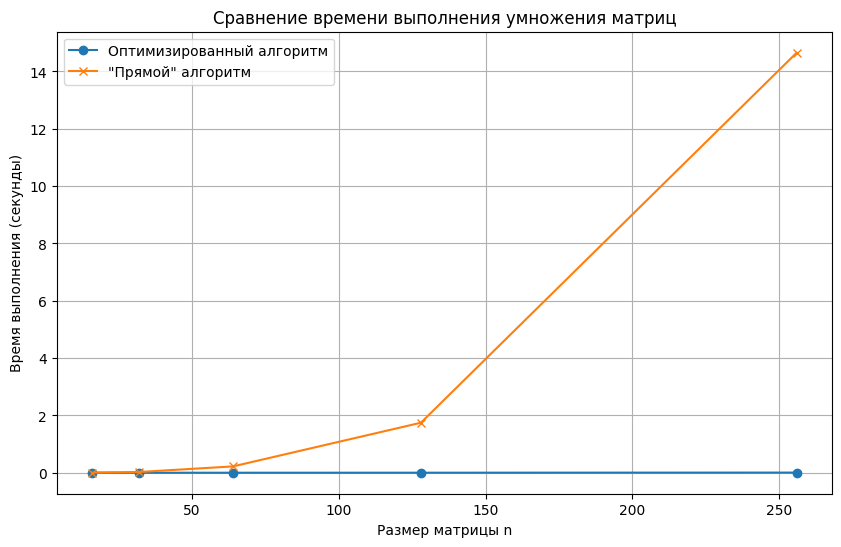

In [ ]:
import numpy as np

def multiply_matrices(mat_left, mat_right):
    """
    Умножает две матрицы с использованием вложенных циклов.

    Параметры:
    mat_left (np.array): Левая матрица размером rows_left x common_dim.
    mat_right (np.array): Правая матрица размером common_dim x cols_right.

    Возвращает:
    np.array: Результат умножения, матрица размером rows_left x cols_right.
    """
    rows_left, common_dim = mat_left.shape
    _, cols_right = mat_right.shape
    result_matrix = np.zeros((rows_left, cols_right))

    for row_index in range(rows_left):  # Для каждой строки левой матрицы
        for col_index in range(cols_right):  # Для каждого столбца правой матрицы
            for common_index in range(common_dim):  # Перемножение и суммирование
                result_matrix[row_index, col_index] += mat_left[row_index, common_index] * mat_right[common_index, col_index]

    return result_matrix


def optimize_mat_mul(mat_left, mat_right):
    """
    Умножает две вещественные матрицы, используя оптимизированную функцию np.dot.

    Аргументы:
    mat_left (np.array): Левая матрица размером MxN, где M - количество строк, N - количество столбцов.
    mat_right (np.array): Правая матрица размером NxP, где N - количество строк (должно совпадать с N левой матрицы), P - количество столбцов.

    Возвращает:
    np.array: Результат умножения, матрица размером MxP.

    """
    return np.dot(mat_left, mat_right)

def generate_square_matrix(n, min_val=0, max_val=10):
    """
    Генерирует квадратную матрицу размером n x n из случайных чисел.

    Параметры:
    n (int): Размерность матрицы (n x n).
    min_val (int): Минимальное значение для элементов матрицы (включительно).
    max_val (int): Максимальное значение для элементов матрицы (включительно).

    Возвращает:
    np.array: Сгенерированная матрица размером n x n.
    """
    # Генерируем матрицу с целочисленными значениями
    matrix = np.random.randint(min_val, max_val+1, size=(n, n))
    # Преобразуем матрицу к типу float32, если нужно работать с числами с плавающей точкой
    return matrix.astype(np.float32)


def check_results(result_opt, result_regular, tolerance=1e-5):
    """
    Проверяет приближенное равенство двух матриц.

    Аргументы:
    result_opt (np.array): Результат быстрого умножения матриц .
    result_regular (np.array): Результат умножения матриц прямым методом.
    tolerance (float): Допустимая погрешность при сравнении.

    Возвращает:
    bool: True, если матрицы приблизительно равны, иначе False.
    """
    return np.allclose(result_opt, result_regular, atol=tolerance)


if __name__ == '__main__':

    import matplotlib.pyplot as plt
    import time

    # Подготовка к замерам времени
    n_values = [16, 32, 64, 128, 256]

    opt_times = []
    regular_times = []

    for n in n_values:
        mat_left = generate_square_matrix(n)
        mat_right = generate_square_matrix(n)

        # Замер времени для оптимизированного алгоритма
        start_time_opt = time.time()
        result_opt = optimize_mat_mul(mat_left, mat_right)
        opt_times.append(time.time() - start_time_opt)

        # Замер времени для прямого метода
        start_time_regular = time.time()
        result_regular = multiply_matrices(mat_left, mat_right)
        regular_times.append(time.time() - start_time_regular)

        # Использование функции для проверки результатов
        if check_results(result_opt, result_regular):
            print(f"Результаты умножения матриц - ОК")
        else:
            print(f"Результаты умножения матриц НЕ совпадают")
            exit(1)

    # Построение графиков
    plt.figure(figsize=(10, 6))
    plt.plot(n_values, opt_times, label='Оптимизированный алгоритм', marker='o')
    plt.plot(n_values, regular_times, label='"Прямой" алгоритм', marker='x')
    plt.xlabel('Размер матрицы n')
    plt.ylabel('Время выполнения (секунды)')
    plt.title('Сравнение времени выполнения умножения матриц')
    plt.legend()
    plt.grid(True)
    plt.show()

Прямой метод имеет алгоритмическую сложность $O(n^3)$, алгоритм Штрассена имеет сложность $O(n^{2.81})$, кроме того он имеет большую эффективность по сравнению с прямым методом.

Вывод: в ходе лабораторной работы изучили алгебраические операции над матрицами, особенности
алгоритмизации быстрых матричных алгоритмов (для ускорения вычисления произведения матриц можно использовать алгоритм Штрассена),
вычисления обратной матрицы, нахождения собственных чисел и собственных векторов
матрицы.